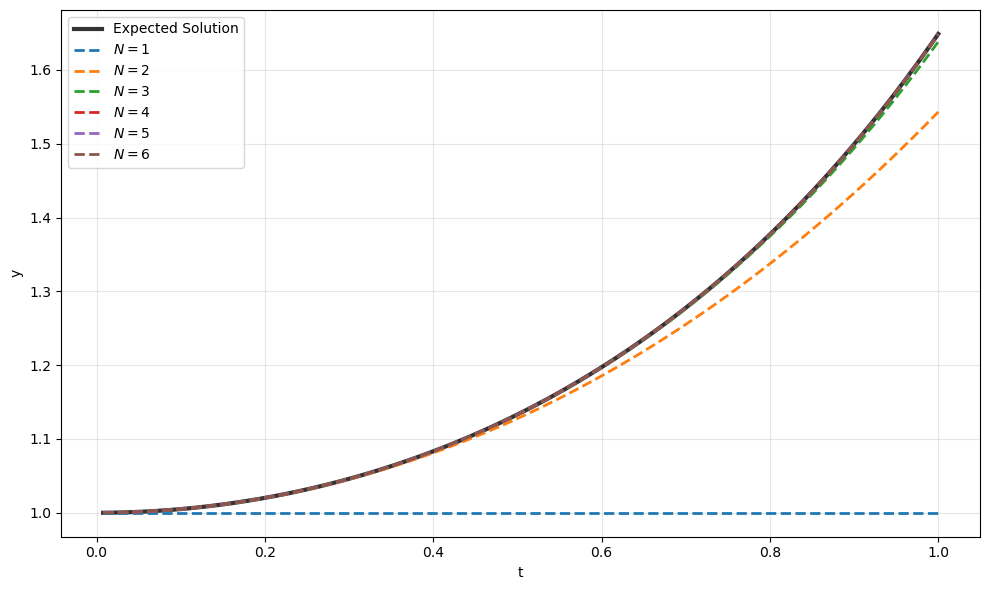

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os


data_dir = "../HW6"
Ns = [1,2,3,4,5,6] 
all_data = {}

for N in Ns:
    filename = os.path.join(data_dir, f"ode_128_{N}.csv")
    df = pd.read_csv(filename)
    all_data[N] = df

sample_df = next(iter(all_data.values()))
times_exact = sample_df['Coord']

plt.figure(figsize=(10, 6))
exact_mean = np.exp(times_exact**2 / 2)
plt.plot(times_exact, exact_mean, 'k-', linewidth=3, label='Expected Solution', alpha=0.8)
for N in sorted(all_data.keys()):
    df = all_data[N]
    plt.plot(df['Coord'], df['Mean_Num'], '--', linewidth=2, label=f'$N={N}$')

plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig("../HW6/ode_mean.png", dpi=200)
plt.show()

# plt.figure(figsize=(10, 6))
# exact_var = np.exp(2 * times_exact**2) - np.exp(times_exact**2)

# plt.plot(times_exact, exact_var, 'k-', linewidth=3, label='Exact Solution', alpha=0.8)

# for N in sorted(all_data.keys()):
#     df = all_data[N]
#     plt.plot(df['Coord'], df['Var_Num'], '--', linewidth=2, label=f'$N={N}$')

# plt.xlabel('t')
# plt.ylabel('y')
# plt.legend()
# plt.grid(True, alpha=0.3)
# plt.tight_layout()
# plt.savefig("../HW6/ode_var.png", dpi=200)
# plt.show()

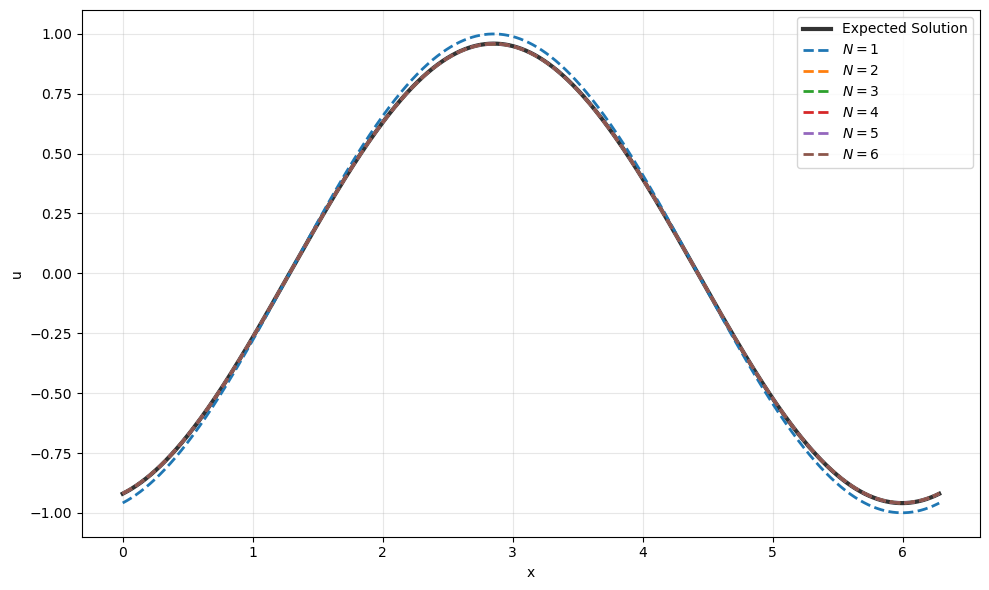

In [26]:
data_dir = "../HW6"
Ns = [1,2,3,4,5,6] 
all_data = {}

for N in Ns:
    filename = os.path.join(data_dir, f"pde_4096_{N}.csv")
    df = pd.read_csv(filename)
    all_data[N] = df

sample_df = next(iter(all_data.values()))
times_exact = sample_df['Coord']

plt.figure(figsize=(10, 6))
exact_mean = np.sin(times_exact + 5.0) * np.sin(0.5) / (0.5)
plt.plot(times_exact, exact_mean, 'k-', linewidth=3, label='Expected Solution', alpha=0.8)
for N in sorted(all_data.keys()):
    df = all_data[N]
    plt.plot(df['Coord'], df['Mean_Num'], '--', linewidth=2, label=f'$N={N}$')

plt.xlabel('x')
plt.ylabel('u')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig("../HW6/pde_mean.png", dpi=200)
plt.show()

# plt.figure(figsize=(10, 6))
# exact_var = 0.5 * (1 - np.cos(2 * (times_exact + 5.0)) * np.sin(1.0)) - exact_mean * exact_mean

# plt.plot(times_exact, exact_var, 'k-', linewidth=3, label='Exact Solution', alpha=0.8)

# for N in sorted(all_data.keys()):
#     df = all_data[N]
#     plt.plot(df['Coord'], df['Var_Num'], '--', linewidth=2, label=f'$N={N}$')

# plt.xlabel('x')
# plt.ylabel('u')
# plt.legend()
# plt.grid(True, alpha=0.3)
# plt.tight_layout()
# plt.savefig("../HW6/pde_var.png", dpi=200)
# plt.show()

../HW6/ode_test.png


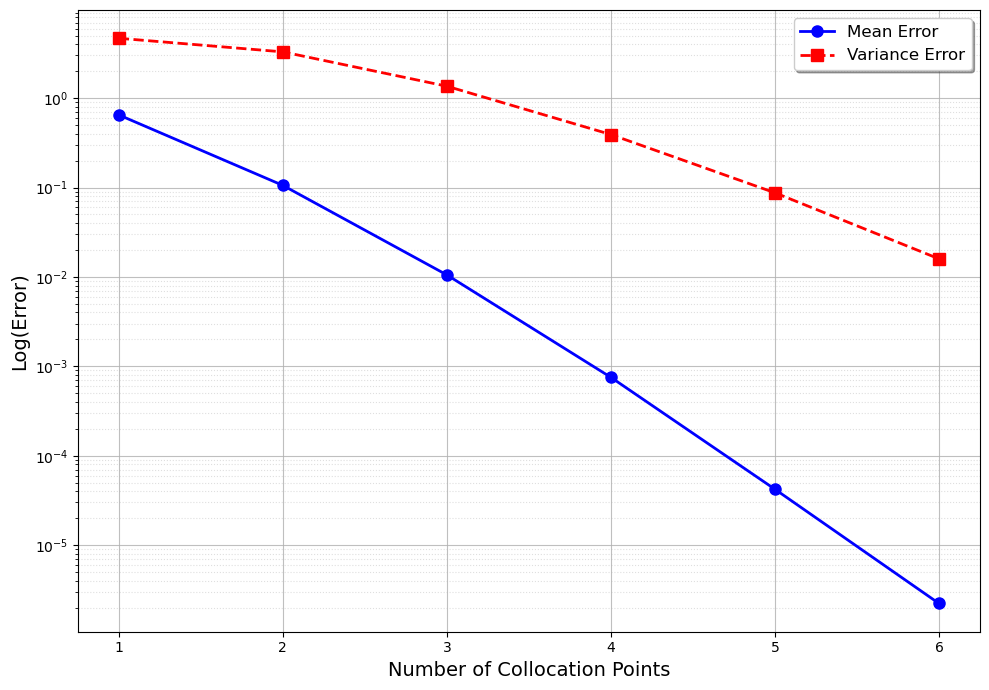

../HW6/pde_test.png


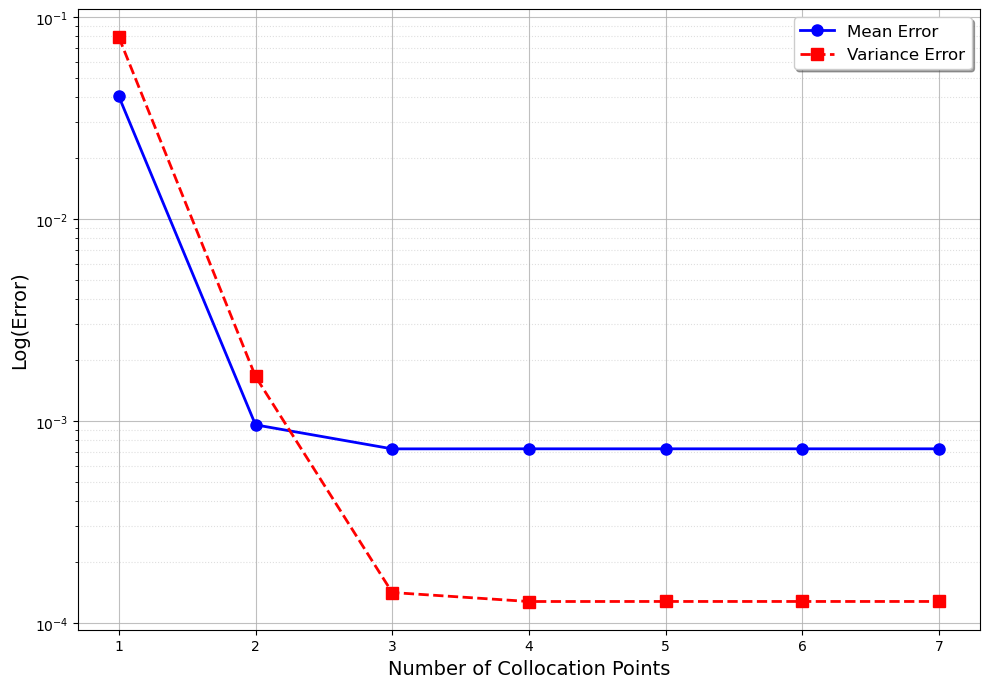

In [20]:
def plot_convergence(file_path):
    df = pd.read_csv(file_path)
    plt.figure(figsize=(10, 7))
    plt.semilogy(df['M'], df['Mean_Error'], 
                 'bo-', linewidth=2, markersize=8, 
                 label='Mean Error')
    plt.semilogy(df['M'], df['Var_Error'], 
                 'rs--', linewidth=2, markersize=8, 
                 label='Variance Error')
    plt.xlabel('Number of Collocation Points', fontsize=14)
    plt.ylabel('Log(Error)', fontsize=14)
    plt.xticks(df['M']) 
    plt.grid(True, which="major", ls="-", alpha=0.8)
    plt.grid(True, which="minor", ls=":", alpha=0.4)
    plt.legend(fontsize=12, loc='best', frameon=True, shadow=True)

    plt.tight_layout()
    name = file_path.replace(".csv", ".png")
    print(name)
    plt.savefig(name, dpi=300)
    plt.show()

if __name__ == "__main__":
    plot_convergence("../HW6/ode_test.csv")
    plot_convergence("../HW6/pde_test.csv")
